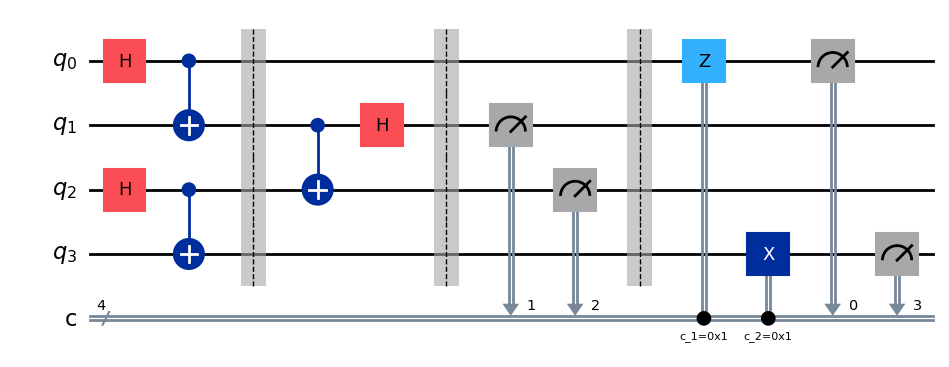

In [8]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

cr = ClassicalRegister(size=4)
qr = QuantumRegister(size=4)

circ = QuantumCircuit(4, 4)

circ.h(0)
circ.cx(0, 1)
circ.h(2)
circ.cx(2, 3)
circ.barrier()

circ.cx(1, 2)
circ.h(1)
circ.barrier()

circ.measure(1, 1)
circ.measure(2, 2)
circ.barrier()


circ.z(0).c_if(1, 1)
circ.x(3).c_if(2, 1)
circ.measure(0, 0)
circ.measure(3, 3)

circ.draw(output='mpl')

In [6]:
from qiskit import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService()
backend = service.backend("ibm_rensselaer")

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(circ)

sampler = Sampler(mode=backend)
# simulator = AerSimulator()
job = sampler.run([isa_circuit], shots=8192)
print(f"Job ID: {job.job_id()}")

Job ID: cxc6q4mpjw30008yhe60


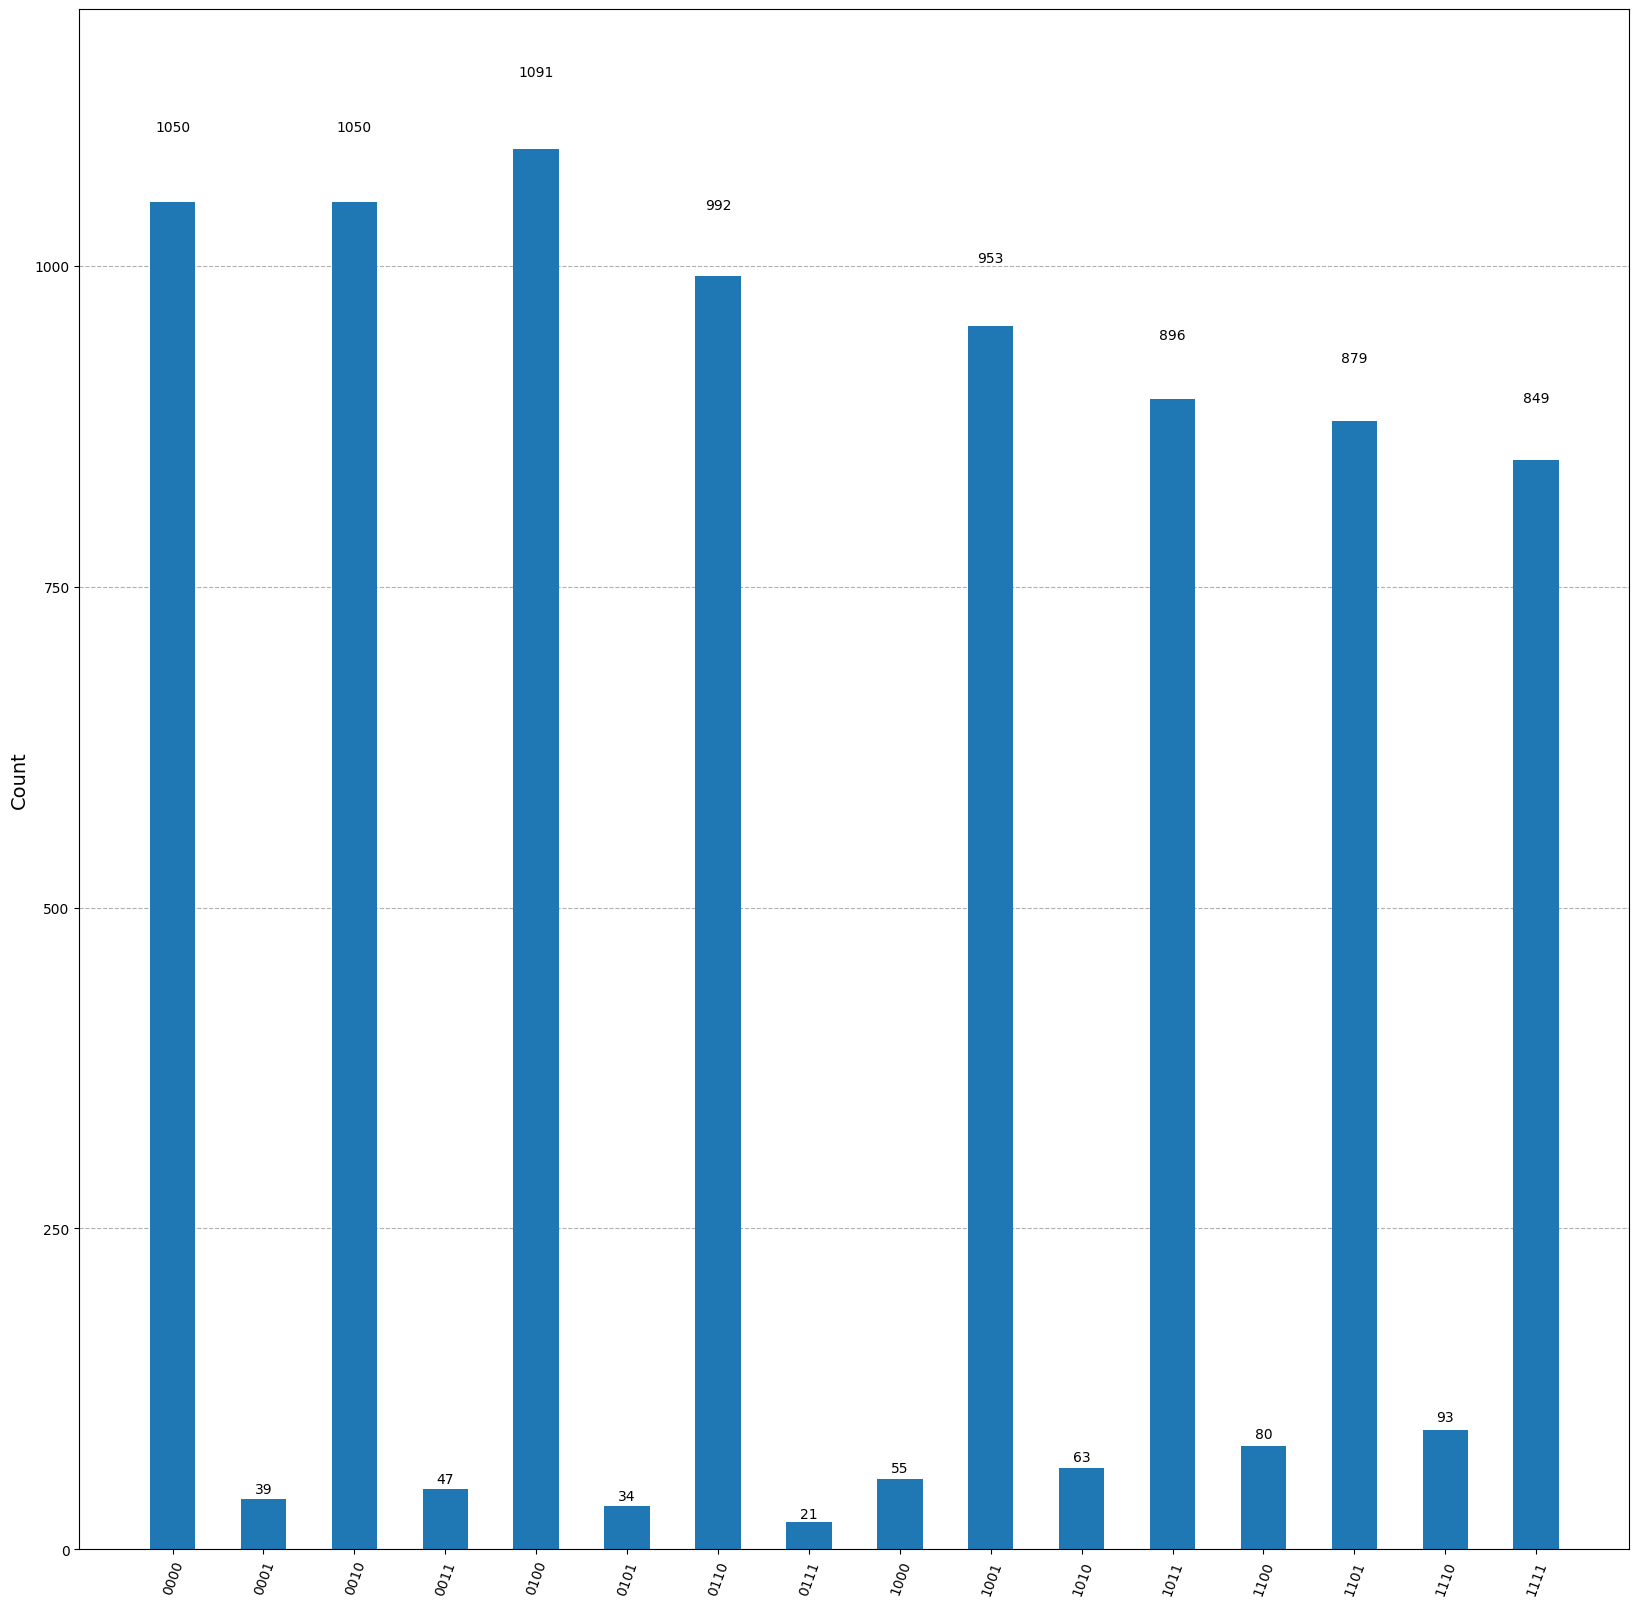

In [7]:
from qiskit.visualization import plot_histogram

result = service.job(job_id='cxc6q4mpjw30008yhe60').result()
data = result[0].data.c.get_counts()

plot_histogram(data, figsize=(20, 20))